### Assignment 2: Forecasting with Linear Model

We will continue using the FRED_MD dataset. Our goal of the day is to forecast US industrial production (INDPRO in our dataset.)

### Import the required moduls

There are the basic imports, but feel free to add anything you may need.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Read the data

I have uploaded the transformed data on github. So we will read it directly from: https://raw.githubusercontent.com/barcelonagse-datascience/academic_datasets/main/fredmd_transformed.csv.

Create a variable called ``dt`` to hold the data, and use pandas to read it from the link above.

In [2]:
dt = pd.read_csv("https://raw.githubusercontent.com/barcelonagse-datascience/academic_datasets/main/fredmd_transformed.csv")

dt.head()

,dates,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,...,0.000666,-0.001124,0.000262,-0.000022,-0.008147,0.004819,0.004929,0.004138,-0.014792,19.311543
1,1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,...,-0.000229,0.001349,0.001752,-0.000022,0.012203,-0.004890,0.012134,0.006734,0.024929,19.311543
2,1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,...,0.000646,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,0.002828,0.002020,-0.015342,19.311543
3,1959-06-01,0.003102,0.002974,0.003708,-0.000052,0.009064,0.001144,0.007034,0.007126,-0.004768,...,0.000329,0.003316,0.002093,-0.004619,0.003992,0.004796,0.009726,0.009007,-0.012252,19.311543
4,1959-07-01,-0.000589,-0.000764,-0.003427,0.012110,-0.000330,-0.024238,0.001167,0.008247,0.013056,...,-0.001521,-0.001238,-0.000100,0.000000,-0.004040,-0.004796,-0.004631,-0.001000,0.029341,19.311543


When working with time series, it is often useful to set the dates as the index of the dataframe. Use the method ``set_index()`` to set the index of our dataframe to the ``dates`` column. Then, inspect ``dt``.



In [5]:
dt.set_index('dates', inplace = True)
dt.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
dates,,,,,,,,,,,,,,,,,,,,,
1959-03-01,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,...,0.000666,-0.001124,0.000262,-0.000022,-0.008147,0.004819,0.004929,0.004138,-0.014792,19.311543
1959-04-01,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,...,-0.000229,0.001349,0.001752,-0.000022,0.012203,-0.004890,0.012134,0.006734,0.024929,19.311543
1959-05-01,0.005763,0.006616,0.012005,0.006797,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,...,0.000646,-0.001687,-0.001937,-0.000021,-0.004090,-0.004819,0.002828,0.002020,-0.015342,19.311543
1959-06-01,0.003102,0.002974,0.003708,-0.000052,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,...,0.000329,0.003316,0.002093,-0.004619,0.003992,0.004796,0.009726,0.009007,-0.012252,19.311543
1959-07-01,-0.000589,-0.000764,-0.003427,0.012110,-0.000330,-0.024238,0.001167,0.008247,0.013056,0.019613,...,-0.001521,-0.001238,-0.000100,0.000000,-0.004040,-0.004796,-0.004631,-0.001000,0.029341,19.311543


As we have seen in class, it is often useful to scale all columns of the dataset to have mean 0 and variance 1. Use `import sklearn.preprocessing.scale()` to scale the columns of ``dt``. There are many ways of doing this, this is merely a suggestion.

In [7]:
import sklearn.preprocessing

# set to False to perform inplace row normalization and avoid a copy
sklearn.preprocessing.scale(dt, copy = False)


(-2.819614030794048e-17, 1.0006620325121056)

In [ ]:
dt['INDPRO'].mean(), dt['INDPRO'].std()

When forecasting, we typically split our data into training and testing. Create a variable called `IS` to hold a boolean 
array (a dummy variable, if you want) for the InSample data.   ``IS`` should be a vector with value True for all observations that have an index smaller than 1999-12-01, and False otherwise.

In [10]:
IS = dt.index < '1999-12-01'


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
dates,,,,,,,,,,,,,,,,,,,,,
1999-07-01,0.001309,0.088724,-0.106757,-0.072299,0.194854,0.392177,-0.065838,-0.220264,-0.494621,0.039758,...,0.575725,0.781961,1.016208,-0.514068,-0.264617,-0.154549,-1.271805,-0.251092,-0.526421,0.313067
1999-08-01,0.173630,0.350246,0.303338,0.446260,0.377517,0.221689,0.553692,0.742457,1.049074,0.597781,...,-0.306471,-0.153195,-0.507431,-0.509901,-0.263205,-0.303958,1.463200,0.099927,0.151707,0.779575
1999-09-01,-0.247661,-0.455709,0.280034,-0.318288,-0.036253,-0.641266,-0.743355,-0.871773,-0.879087,-0.551318,...,0.064095,0.587731,0.922006,1.183701,0.590379,0.301202,-2.525567,-0.144083,-0.046818,0.969813
1999-10-01,0.280343,0.687956,-0.048777,0.516143,-0.178606,1.088318,1.170154,1.201696,1.659146,0.949661,...,-0.134876,-1.145285,-0.261282,-1.015771,-0.002624,-0.753473,1.346225,-0.239986,0.189323,0.872024
1999-11-01,0.352612,0.910220,0.268144,0.232347,0.455304,0.311983,-0.082881,-0.256028,-0.215355,-0.310423,...,-0.126115,-0.397858,-0.215423,-0.000233,-0.522461,0.301747,0.218093,0.102855,-1.092327,0.419996


Then, define `dt_train` as the insample (training). We define as insample everything up to and excluding 1999-12-01, so that our first forecast is for 2000-01-01. ``dt_train`` should contain all observations with index smaller than 1999-12-01.*Hint*:  The help for ``DataFrame.loc[]`` says: ``.loc[]`` is primarily label based, but may also be used with a boolean array.

In [ ]:
dt_train = dt.loc[IS, :]
dt_train.tail()

Proceed analogously for ``dt_test``. i.e. define `dt_test` as the out-of-sample (testing) version of our dataset.``dt_test`` should contain the observations that are not in ``dt_train``. *Hint*:  The help for ``DataFrame.loc[]`` says: ``.loc[]`` is primarily label based, but may also be used with a boolean array.

In [ ]:
dt_test = dt.loc[~IS, :]

Now, our goal is to forecast `INDPRO`, so our $y$ variable is Industrial Production and $\bf x $ the remaining variables in our dataset.


**NOTE**: if our forecasts are supposed to be helpful, they have to be made at time $t$ for $t+1$, meaning that we have to use a model similar to:

$$ \hat{y}_{t+1} = \bf{x}_t'\hat\beta, $$

**as opposed to**
$$ \hat{y}_{t+1} = \bf{x}_{t+1}'\hat\beta,$$

which relies on the (unknown at time $t$) vector $\bf{x}_{t+1}$, so now we need to adjust for this in both our test and training datasets. In particular, we have to drop the first observation of $y$ and the last observation of $\bf{x}$. 
Our dataset will then contain the pairs $(y_1,x_0),\dots,(y_t,x_{t-1})$. 

Note also that $y_0$ may be included in $x_0$, meaning it is valid to forecast $y_t$ using $y_{t-1}$.

Start by defining the variable ``y_train`` as *leading* ``INDPRO``. In other words, the variable ``y_train`` should hold INDPRO from periods 1 to T (as opposed to 0 to T)

In [17]:
y_train = dt_train['INDPRO'][1:]

Then, define ``X_train`` to be all variables in ``dt_train`` (including INDPRO), from period 0 to period (T-1).

In [13]:
X_train = dt_train.iloc[:-1, :]

Now repeat the process, but for ``y_test`` and ``X_test``.

In [18]:
y_test = dt_test['INDPRO'][1:]
X_test = dt_test.iloc[:-1, :]

Lets create a pandas DataFrame to hold our forecasts and another for the forecast errors. Lets use as indexes of these dataframes the index of ``y_test``.

In [31]:
forecasts = pd.DataFrame(index = y_test.index)
forecast_err = pd.DataFrame(index = y_test.index)
forecasts.index[0]

'2000-01-01'

### Forecasting models

Now we will define our forscasting models

### Recall: Functions in python

Below is an example of a function in python

In [20]:
def myfun(arg):
  out = arg + 4
  return out

In [21]:
myfun(3)

7

### Unconditional mean

First, define a fucntion called `naive_forecaster`, this function takes as argument `y_train` and return the mean of `y_train`

In [22]:
def naive_forecaster(y_train):
  y_train_mean = np.mean(y_train)
  return y_train_mean

In [23]:
naive_forecaster(y_train)

0.08058108806413856

### Full Model
Next, we consider a forecaster that forecasts using a linear regression of $y_t$ on $\bf{x}_{t-1}$ without any regularization. Note that $\bf{x}_{t-1}$ includes $y_{t-1}$.

We will call this forecaster ``full_model``. This function should take as inputs `y_train`, `x_train` and `x_test`, and it should output a vector of predictions based on `x_test`. *Hint*: you may use ``from sklearn.linear_model import LinearRegression`` and follow what we did in the Linear Regression class.


In [33]:
from sklearn.linear_model import LinearRegression

def full_model(y_train, x_train, x_test):
  reg = LinearRegression(fit_intercept = True)
  reg.fit(X = x_train, y = y_train)
  return   reg.predict(x_test)

  

### Selected Model
As an economist, you decided to consider a forecasting model that includes only a few selected variables. In particular, you decided to include the following variables in your predictive regression `UNRATE`, `TB3SMFFM`, `CPIAUCSL`, `S&P 500` and lagged `INDPRO` itself. Create a function called ``sel_model`` that takes as inputs `y_train`, `x_train`, `x_test` and `sel_vars`, and outputs a vector of predictions based on (a subset of) `x_test`. 
_Hint_: we can use the ``full_model`` function on the subset of selected variables, for instance by creating a new dataframe to hold only the selected subset, or by indexing the original dataframe.

In [25]:
sel_vars = ['UNRATE', 'TB3SMFFM', 'CPIAUCSL', 'S&P 500', 'INDPRO']

def sel_model(y_train, x_train, x_test, sel_var):
  x_train_temp = x_train[sel_vars]
  x_test_temp = x_test[sel_vars]
  return full_model(y_train, x_train_temp, x_test_temp)

### Polynomials of Selection Variables

Trusting our intuition about the variables, lets also include polynomials of each variable. Create a function that takes as inputs  `y_train`, `x_train`, `x_test`, `sel_vars` and `order`, and outputs a vector of predictions based on polynomials of (a subset of) `x_test`. *Hint*: you may use
``from sklearn.preprocessing import PolynomialFeatures as plf``

In [37]:
from sklearn.preprocessing import PolynomialFeatures as plf

def poly_reg(y_train, x_train, x_test, sel_vars, order):
  regplf = LinearRegression(fit_intercept = False)
  x_train_poly = plf(order).fit_transform(x_train[sel_vars])
  x_test_poly = plf(order).fit_transform(x_test[sel_vars])
  regplf.fit(y = y_train, X = x_train_poly)
  return regplf.predict(x_test_poly)


### LASSO

Good coding practice would be to define functions to forecast, as we have been doing. But since our objective is to understand the procedures, lets leave that aside for the moment. Instead, lets create a `LassoCV` instance, and fit the instance to our data by calling the method `.fit()`. 

_Hint_: to avoid warnings, you may want to set the `max_iter` parameter to a large enough number.

In [70]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(fit_intercept = True,
                max_iter = 1000000,
                cv = 5)
lasso.fit(X = X_train, y = y_train)

LassoCV(cv=5, max_iter=1000000)

In [78]:
print(X_train.shape)
print(lasso.mse_path_.shape)
print(lasso.alphas_.shape)
pd.DataFrame(lasso.mse_path_).head()

(488, 123)
(100, 5)
(100,)


,0,1,2,3,4
0,1.288055,0.907031,0.802437,0.265064,0.230522
1,1.284158,0.901571,0.788305,0.261769,0.229087
2,1.273850,0.884557,0.775746,0.258472,0.228064
3,1.264783,0.869579,0.763448,0.255579,0.227385
4,1.256804,0.856385,0.752207,0.253042,0.226990


### LASSO Advanced
Lets visualize the regularization parameters. Create a plot  with `log(alphas)` on the x-axis, and the average (over folds) of the `mse_path` on the `y_axis`.
_Hint_: inspect the attribute `.mse_path_` of our fitted `LassoCV` instance.

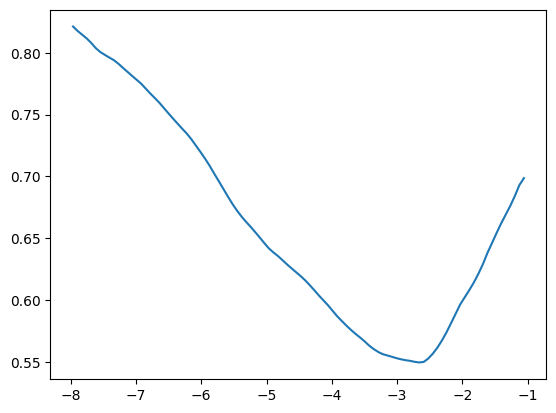

In [76]:
plt.plot(np.log(lasso.alphas_), lasso.mse_path_.mean(axis = 1))
plt.show()

In [81]:
from sklearn.linear_model import Lasso

lasso_min = Lasso(alpha = lasso.alphas_.min(),
                  max_iter = 1000000)
lasso_max = Lasso(alpha = lasso.alphas_.max())

lasso_min.fit(X = X_train, y = y_train)
lasso_max.fit(X = X_train, y = y_train)

print((np.abs(lasso_min.coef_) > 0).sum(),
      (np.abs(lasso_max.coef_) > 0).sum(),
      (np.abs(lasso.coef_) > 0).sum())

X_train.columns[np.abs(lasso.coef_) > 0]

112 1 12


Index(['IPMAT', 'IPDMAT', 'UEMP5TO14', 'NDMANEMP', 'PERMIT', 'PERMITS',
       'AMDMUOx', 'GS1', 'AAA', 'TB3SMFFM', 'CES0600000008', 'CES2000000008'],
      dtype='object')

### Ridge

Lets try forecasting with Ridge now. We will proceed similarly to LASSO.
Note that RidgeCV instances take an input `store_cv_values`. We want this to be set to True. Also note: Ridge does leave one out CV as opposed to 5-fold CV.
Call your ``RidgeCV`` instance `ridge`.

In [101]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(fit_intercept = True,
                store_cv_values = True)
ridge.fit(X = X_train, y = y_train)

RidgeCV(store_cv_values=True)

In [98]:
print(X_train.shape)
print(ridge.cv_values_.shape)
print(ridge.alphas)
pd.DataFrame(ridge.cv_values_).head()


(488, 123)
(488, 3)
(0.1, 1.0, 10.0)


,0,1,2
0,0.828575,0.730740,0.592882
1,0.000253,0.053041,0.133812
2,0.740626,0.895828,0.946971
3,9.296467,9.771165,9.516622
4,9.091973,7.401816,6.264536


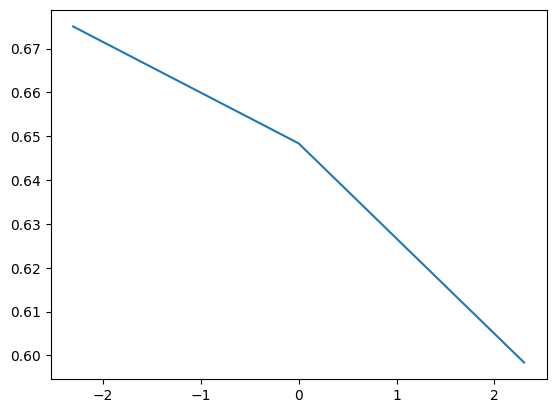

In [84]:
plt.plot(np.log(ridge.alphas), ridge.cv_values_.mean(axis = 0))
plt.show()

This is the importance of reading the documentation, visualizing and understanding what the code is doing! Ridge is only considering 3 values for alpha, and this is clearly suboptimal. Lets construct a better grid.

First, lets start with a guess for a small enough alpha. Say `alpha_min_ridge=0.01`. Construct a Ridge instance with this alpha.

In [106]:
from sklearn.linear_model import Ridge
alpha_min = 0.01
ridge_min = Ridge(alpha = alpha_min, max_iter = 1000000)
ridge_min.fit(X = X_train, y = y_train)

Ridge(alpha=0.01, max_iter=1000000)

Next, construct a large value for alpha, and lets see how far our coefficients are from the standard regression. (say `alpha_max_ridge=10000`)

In [103]:
alpha_max = 10000
ridge_max = Ridge(alpha = alpha_max, max_iter = 1000000)
ridge_max.fit(X = X_train, y = y_train)

Ridge(alpha=10000, max_iter=1000000)

Finally, lets consider the following grid:


In [107]:
alpha_grid = np.exp(np.linspace(np.log(alpha_min), np.log(alpha_max), 1000))

and estimate our Ridge again using CV.

In [108]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(fit_intercept = True,
                store_cv_values = True,
                alphas = alpha_grid)

ridge.fit(X = X_train, y = y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.01392541e-02, 1.02804473e-02, 1.04236067e-02,
       1.05687597e-02, 1.07159340e-02, 1.08651577e-02, 1.10164595e-02,
       1.11698682e-02, 1.13254132e-02, 1.14831241e-02, 1.16430313e-02,
       1.18051653e-02, 1.19695570e-02, 1.21362380e-02, 1.23052400e-02,
       1.24765955e-02, 1.26503372e-02, 1.28264983e-02, 1.30051125e-02,
       1.31862140e-02, 1.33698374e-0...
       7.27548353e+03, 7.37679760e+03, 7.47952252e+03, 7.58367791e+03,
       7.68928372e+03, 7.79636013e+03, 7.90492762e+03, 8.01500696e+03,
       8.12661920e+03, 8.23978568e+03, 8.35452806e+03, 8.47086827e+03,
       8.58882856e+03, 8.70843150e+03, 8.82969996e+03, 8.95265713e+03,
       9.07732653e+03, 9.20373200e+03, 9.33189772e+03, 9.46184819e+03,
       9.59360829e+03, 9.72720319e+03, 9.86265846e+03, 1.00000000e+04]),
        store_cv_values=True)

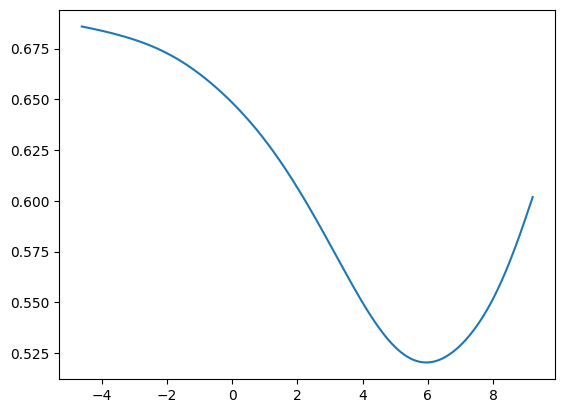

In [113]:
plt.plot(np.log(ridge.alphas), ridge.cv_values_.mean(axis = 0))

**Much better!**

### Elastic Net

Lets try the elastic net now. We will continue using scikit learn. See the help file for ElasticNetCV for more details. Call your ``ElasticNetCV`` instance `elnet`.

In [29]:
from sklearn.linear_model import ElasticNetCV

elnet = ElasticNetCV(fit_intercept = False,
                     max_iter = 1000000)
elnet.fit(X = X_train, y = y_train) 

ElasticNetCV(fit_intercept=False, max_iter=1000000)

and our standard plot

In [117]:
print(elnet.mse_path_.shape)
pd.DataFrame(elnet.mse_path_).head()

(100, 5)


,0,1,2,3,4
0,1.306026,0.886367,0.798833,0.257284,0.248411
1,1.306026,0.879053,0.786974,0.254704,0.246898
2,1.303767,0.866588,0.775005,0.252431,0.245637
3,1.297823,0.855144,0.764116,0.250433,0.244582
4,1.292383,0.842285,0.754216,0.248681,0.243731


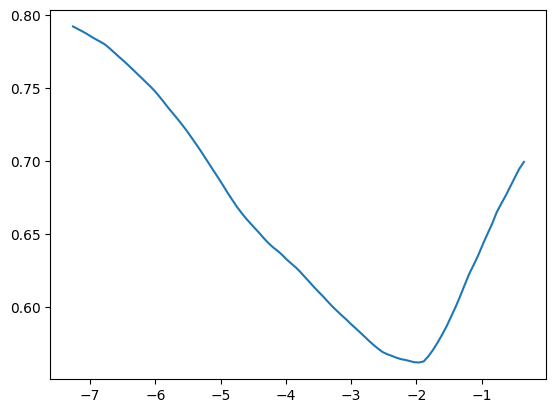

In [115]:
plt.plot(np.log(elnet.alphas_), elnet.mse_path_.mean(axis = 1))

### Out-of-sample forecasting

Lets now construct our forecasts. There are a number of ways to do this. For our functions, we just need to call the functions and that should already output forecasts. For the methods for which we did not create a function, we need to use the ``.predict()`` method. 

Assign a column in the ``forecasts`` DataFrame to each of the methods considered. For example, ``forecasts['naive']`` should hold the naive forecasts (one for each out of sample observation), and ``forecast_err['naive']`` should hold the series of squared errors (one for each out of sample observation, **not their average!**) -- the squared difference between the ``y_test`` and our forecasts. 

In [40]:
forecasts['naive'] = naive_forecaster(y_train)
forecast_err['naive'] = (y_test - forecasts['naive'])**2

forecasts['Full'] = full_model(y_train, X_train, X_test)
forecast_err['Full'] = ( y_test - forecasts['Full'])**2

forecasts['Selected'] = sel_model(y_train, X_train, X_test, sel_vars)
forecast_err['Selected'] = ( y_test - forecasts['Selected'])**2

forecasts['SelectedNL'] = poly_reg(y_train, X_train, X_test, sel_vars, 2)
forecast_err['SelectedNL'] = ( y_test - forecasts['SelectedNL'])**2

forecasts['LASSO'] = lasso.predict(X_test) 
forecast_err['LASSO'] = ( y_test - forecasts['LASSO'])**2

forecasts['Ridge'] = ridge.predict( X_test ) 
forecast_err['Ridge'] = ( y_test - forecasts['Ridge'])**2

forecasts['ElNet'] = elnet.predict( X_test ) 
forecast_err['ElNet'] = ( y_test - forecasts['ElNet'])**2

and compute our MSE as the average of each column in our ``forecast_err`` dataframe. Print the MSE. Which model does the best out of sample? 

In [41]:
MSE =  pd.DataFrame(forecast_err.mean(axis=0), columns=['MSE']).transpose()
MSE

,naive,Full,Selected,SelectedNL,LASSO,Ridge,ElNet
MSE,1.575803,15.803573,1.784812,91.24108,1.558627,1.796195,1.492542
